In [1]:
import numpy as np
import matplotlib.pyplot as plt

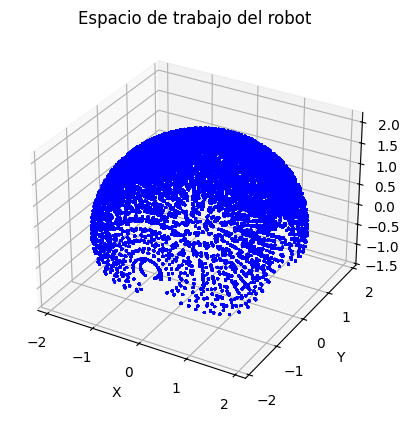

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir variables simbólicas para las articulaciones y longitudes
q1, q2, q3, q4, q5, q6 = sp.symbols('q1 q2 q3 q4 q5 q6')
l1, l2 = sp.symbols('l1 l2')

# Funciones de rotación
def rot_x(theta):
    return sp.Matrix([
        [1, 0, 0],
        [0, sp.cos(theta), -sp.sin(theta)],
        [0, sp.sin(theta), sp.cos(theta)]
    ])

def rot_y(theta):
    return sp.Matrix([
        [sp.cos(theta), 0, sp.sin(theta)],
        [0, 1, 0],
        [-sp.sin(theta), 0, sp.cos(theta)]
    ])

def rot_z(theta):
    return sp.Matrix([
        [sp.cos(theta), -sp.sin(theta), 0],
        [sp.sin(theta), sp.cos(theta), 0],
        [0, 0, 1]
    ])

# Matrices de rotación y desplazamiento
R1 = rot_y(q1)
R2 = rot_z(q2)
R3 = rot_x(q3)
R4 = rot_x(q4)
R5 = rot_x(q5)
R6 = rot_z(q6)

d1 = sp.Matrix([0, 0, 0])
d2 = sp.Matrix([0, 0, 0])
d3 = sp.Matrix([0, 0, 0])
d4 = sp.Matrix([0, 0, l1])
d5 = sp.Matrix([0, 0, l2])
d6 = sp.Matrix([0, 0, 0])

# Transformaciones homogéneas
T1 = sp.Matrix.vstack(sp.Matrix.hstack(R1, d1), sp.Matrix([[0, 0, 0, 1]]))
T2 = sp.Matrix.vstack(sp.Matrix.hstack(R2, d2), sp.Matrix([[0, 0, 0, 1]]))
T3 = sp.Matrix.vstack(sp.Matrix.hstack(R3, d3), sp.Matrix([[0, 0, 0, 1]]))
T4 = sp.Matrix.vstack(sp.Matrix.hstack(R4, d4), sp.Matrix([[0, 0, 0, 1]]))
T5 = sp.Matrix.vstack(sp.Matrix.hstack(R5, d5), sp.Matrix([[0, 0, 0, 1]]))
T6 = sp.Matrix.vstack(sp.Matrix.hstack(R6, d6), sp.Matrix([[0, 0, 0, 1]]))

# Transformación total
T_total = T1 * T2 * T3 * T4 * T5 * T6

# Extraer la posición del efector final
position = T_total[:3, 3]

# Convertir la posición a una función numérica
position_func = sp.lambdify((q1, q2, q3, q4, q5, q6, l1, l2), position, "numpy")

# Definir límites para las articulaciones
q_limits = {
    q1: (-np.pi/3, np.pi/3),
    q2: (-np.pi/3, np.pi/3),
    q3: (-np.pi/3, np.pi/3),
    q4: (-np.pi/3, np.pi/3),
    q5: (-np.pi/3, np.pi/3),
    q6: (-np.pi/3, np.pi/3)
}

# Longitudes de los eslabones (valores ejemplo)
lengths = {
    l1: 1.0,
    l2: 1.0
}

# Generar puntos en el espacio de trabajo
samples = 10  # Número de muestras por articulación
x_points, y_points, z_points = [], [], []

q1_vals = np.linspace(*q_limits[q1], samples)
q2_vals = np.linspace(*q_limits[q2], samples)
q3_vals = np.linspace(*q_limits[q3], samples)
q4_vals = np.linspace(*q_limits[q4], samples)
q5_vals = np.linspace(*q_limits[q5], samples)
q6_vals = np.linspace(*q_limits[q6], samples)

for q1_val in q1_vals:
    for q2_val in q2_vals:
        for q3_val in q3_vals:
            for q4_val in q4_vals:
                for q5_val in q5_vals:
                    for q6_val in q6_vals:
                        pos = position_func(q1_val, q2_val, q3_val, q4_val, q5_val, q6_val, *lengths.values())
                        x_points.append(pos[0])
                        y_points.append(pos[1])
                        z_points.append(pos[2])

# Visualizar el espacio de trabajo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points, y_points, z_points, s=1, c='blue', alpha=0.6)
ax.set_title("Espacio de trabajo del robot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
